# Diabetes 
link to dataset: [diabetes dataset](https://www.kaggle.com/mathchi/diabetes-data-set)

Goal: The goal of this project is to develop a conservative diabetes classifier. Conservative here is in the sense that we'd like
to have a recall above a certain threshold. That threshold is selected to be 80%.

To achieve this end we go through the following steps


1. EDA and Feature Engineering
- Clean Data
- Missing Data
- Box Plots
- Histograms
- Selecting Features
- Ideas for Introduction of Features
2. Model Building and Visualizations
- Conservative Model Building Philosophy
- Testing and Visualizing Different Models
3. Future Improvements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')

# 1. EDA, Understanding the Data

In [2]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe() #Some values that have 0 for gluclose, bloodpressure, skinthickness, etc. Maybe they're null?

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum() #no null values

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [5]:
# It looks like some values where the gluclose reading = 0 is perhaps 
# actually a null? I think that this is happening with other columns too, so 
# I'll replace the zeros with the median of the nonzero entries
df[df['glucose']==0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [6]:
df['glucose'].replace(0, df[df['glucose']>0].loc[:,'glucose'].median(), inplace=True)

In [7]:
# I'm going to do something similar for other entries which have zeros
df['bloodpressure'].replace(0, df[df['bloodpressure']>0].loc[:,'bloodpressure'].median(), inplace=True)
df['insulin'].replace(0, df[df['insulin']>0].loc[:,'insulin'].median(), inplace=True)
df['bmi'].replace(0, df[df['bmi']>0].loc[:,'bmi'].median(), inplace=True)
df['skinthickness'].replace(0, df[df['skinthickness']>0].loc[:,'skinthickness'].median(), inplace=True)

In [8]:
df.describe() #looks better

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


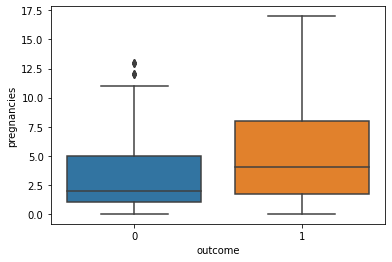

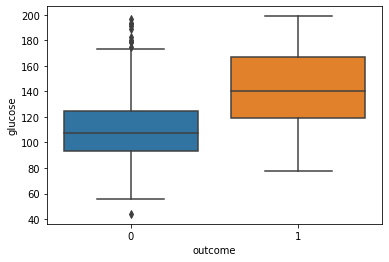

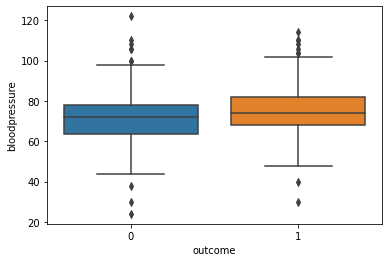

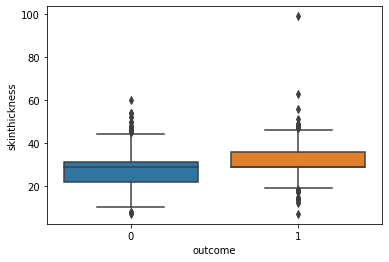

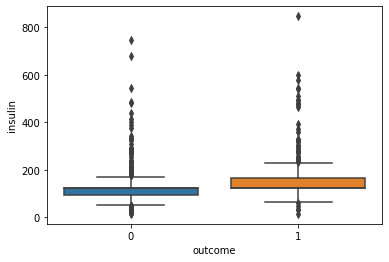

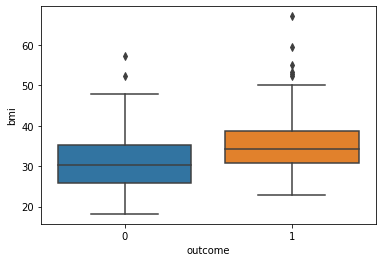

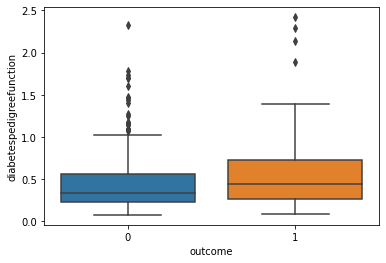

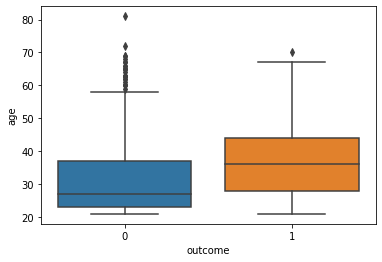

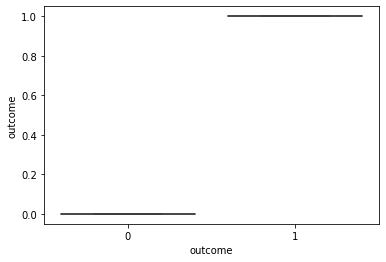

In [9]:
for i in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='outcome', y=i) #Looks like the boxplots indicated some outliers. Perhaps one could consider a replacement strategy, 
    #but for now I'll keep things simple and keep them.

<AxesSubplot:>

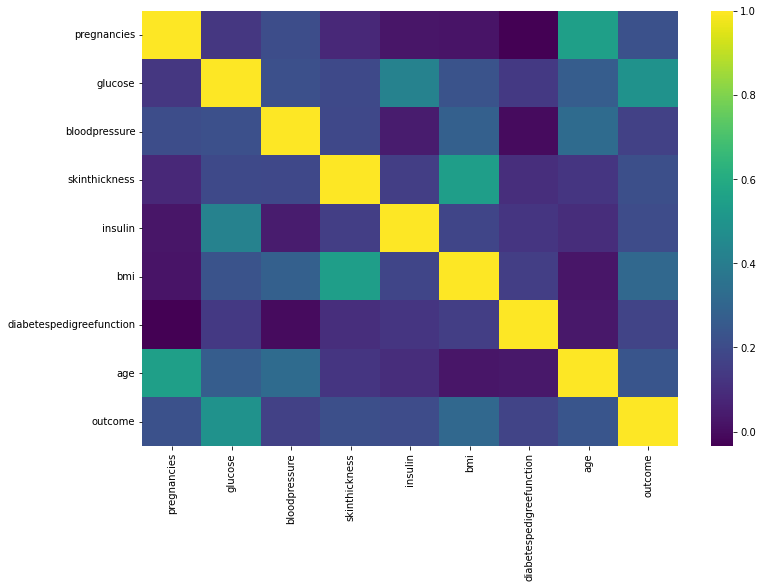

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis') #Some expected correlations are here, such as pregnancies with age, glucose with outcome (having diabetes = 1 in outcome), etc.

In [11]:
pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
# Looks like all of the features are higher for diabetecs, as well as more varied (from the next graph)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
outcome,,,,,,,,
0,31.190000,70.920000,30.885600,0.429734,110.682000,127.792000,3.298000,27.726000
1,37.067164,75.123134,35.383582,0.550500,142.130597,164.701493,4.865672,31.686567


In [12]:
pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.std)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
outcome,,,,,,,,
0,11.667655,11.929385,6.504128,0.299085,24.707201,74.447469,3.017185,8.552966
1,10.968254,11.951672,6.595603,0.372354,29.568839,100.932249,3.741239,8.662994


/home/jcummings/.local/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


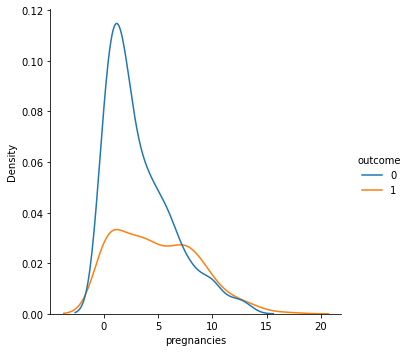

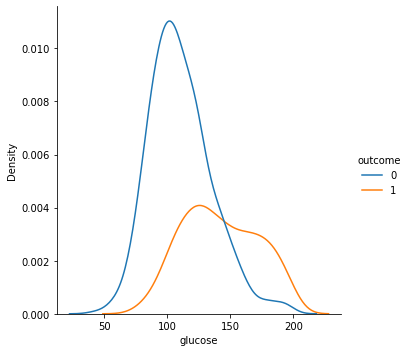

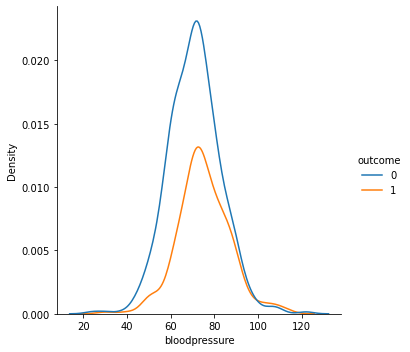

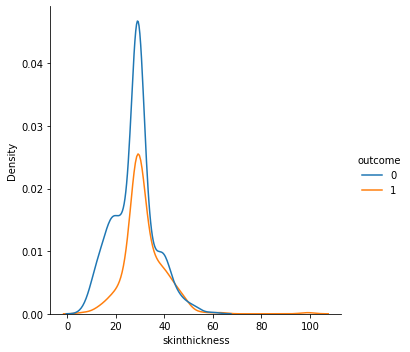

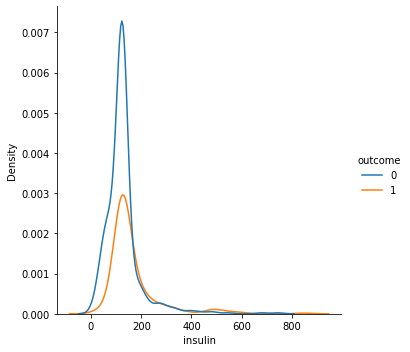

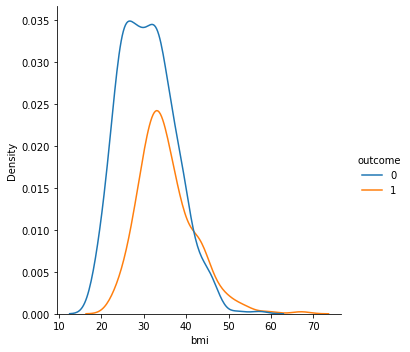

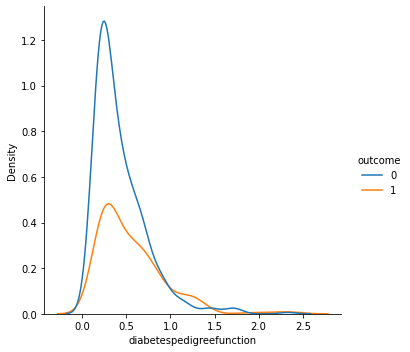

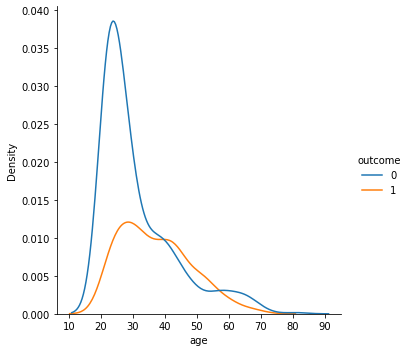

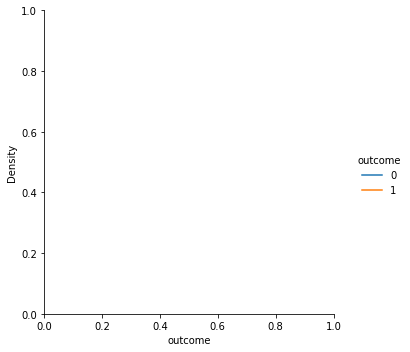

In [13]:
for i in df.columns:
    sns.displot(data=df,x=i,hue='outcome',kind='kde') 
# It is looking like I'll want to keep all these features, except perhaps skin thickness.
# There is a lot of right-skewed data for diabetes (outcome) variable

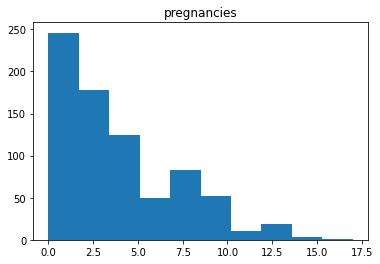

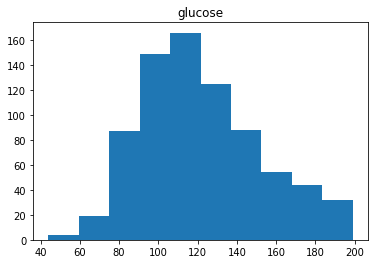

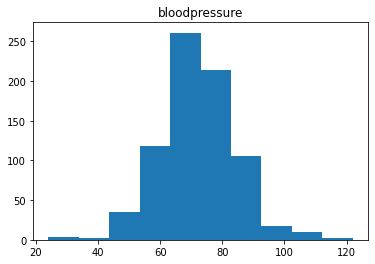

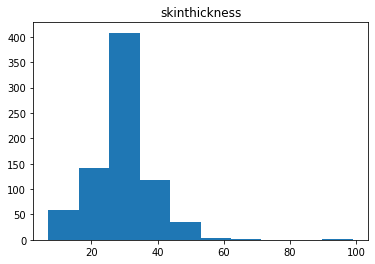

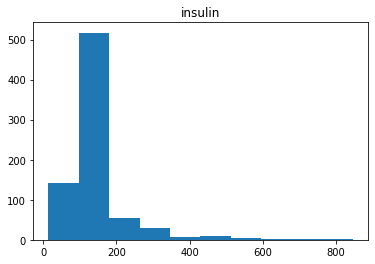

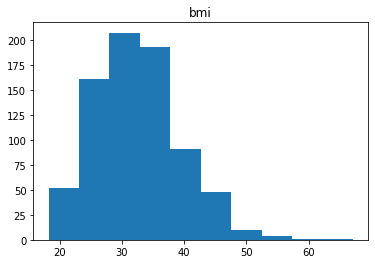

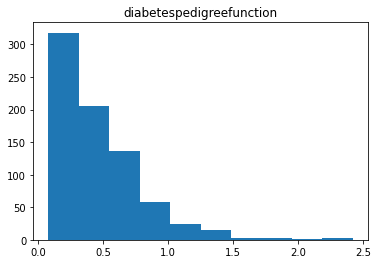

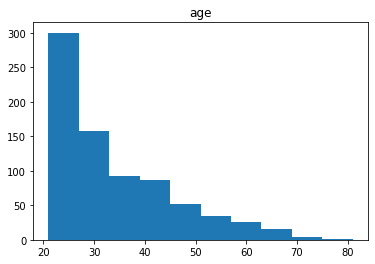

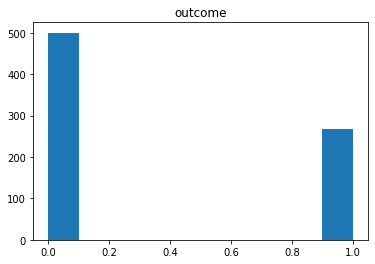

In [14]:
%matplotlib inline
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()
# The diabetes pedigree fucntions and age could be logged to make them more normal

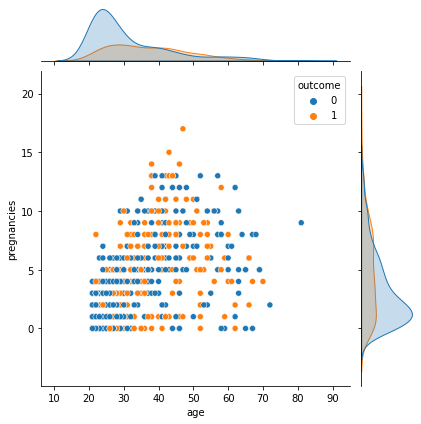

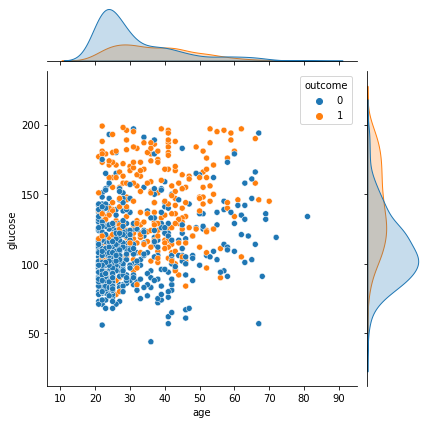

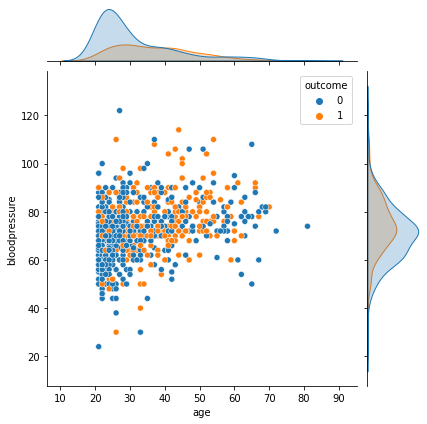

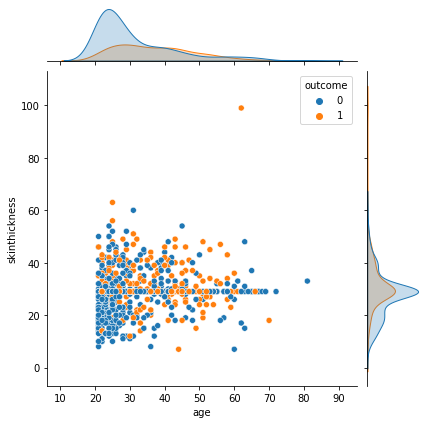

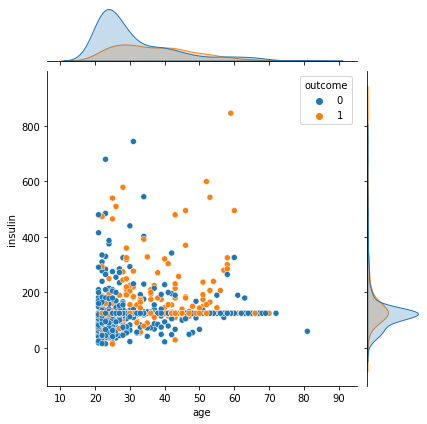

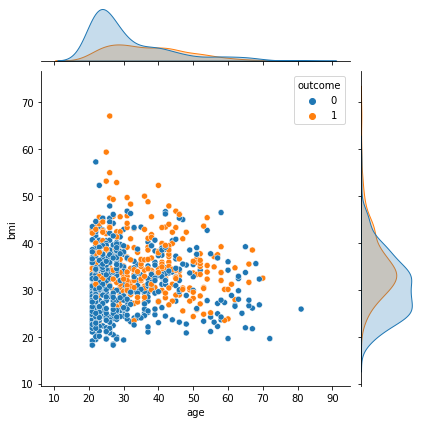

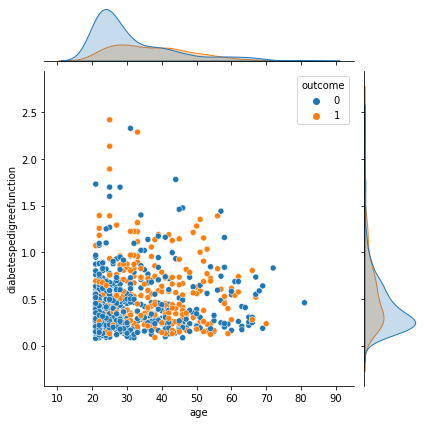

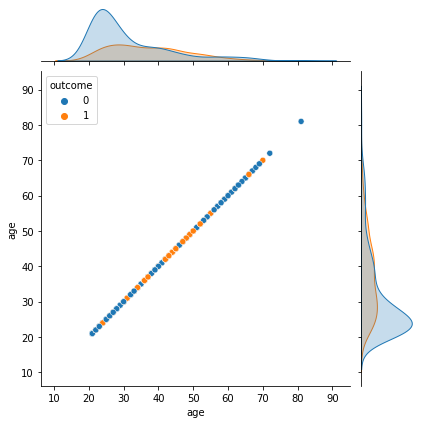

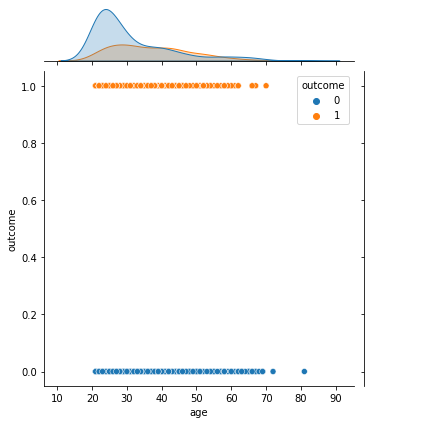

In [15]:
# I want to take a look at features and age. Maybe I use healthy values of the features by age to create new features in the future.
for i in df.columns:
    sns.jointplot(data = df, x = 'age', y = i, hue='outcome')

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaling the parameters
ss = StandardScaler()
cols_to_scale = ['pregnancies', 'age', 'bmi', 'diabetespedigreefunction', 'bloodpressure', 'insulin', 'glucose']# cols not included: 'age', 'pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction',  'bloodpressure','skinthickness'
cols_not_scaled = ['outcome']
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_scaled = pd.DataFrame(ss.fit_transform(df[cols_to_scale]), index=df.index, columns=cols_to_scale)
df_scaled[cols_not_scaled] = df[cols_not_scaled]
pd.pivot_table(df_scaled, index=['outcome'],  values = df_scaled.columns, aggfunc = np.mean)

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies
outcome,,,,,,,
0,-0.174505,-0.121329,-0.228450,-0.127275,-0.360776,-0.149199,-0.162456
1,0.325569,0.226360,0.426212,0.237453,0.673089,0.278356,0.303090


# 2. Model Building and Visualization
My goal is to create a model with 80% recall on identifying Diabetes. With that in mind, I first build a 
helper function, summary_of_model, for summaries and visualizations of confusion matricies and precision-recall curves, as well 
. Then I use gridsearchcv to optimize on roc_auc for the following types of models: 

* Dummy classifier (for comparison)
* Gradient Boosting Classifier
* Logistic Regression
* Support Vector Machine
* Random Forest
* K Nearest Neighbors
* Decision Tree Classifier

I then use another helper function, find_threshold, to decrease the probability threshold of predicting positive
until I achieve a recall on identifying diabetes of 80%. Precision and recall are of course trade-offs here, 
but since we view it as more critical to identify a diabetic, I am content with more false positives.

In [17]:
from sklearn.model_selection import train_test_split
y=df_scaled.pop('outcome')
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=.2)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
def summary_of_model(clf, X_train, X_test, y_train, y_test, threshold):
    # This provides a summary of the model given a certain decision threshold of the predicted probability.
    # It includes a summary on recall/accuracy on the training and test sets, a visual display of the confusion matrix
    # and a plot of the precision-recall curve for a given classifier.
    pred_proba_test = clf.predict_proba(X_test)
    pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
    pred_proba_train = clf.predict_proba(X_train)
    pred_train = (pred_proba_train [:,1] >= threshold).astype('int')
    print(classification_report(y_test, pred_test))
    print('Recall of diabetes on the training set: {:.2f}'.format(recall_score(y_train, pred_train)))
    print('Accuracy on the training set: {:.2f}'.format(accuracy_score(y_train, pred_train)))
    print('Recall of diabetes class on the test set: {:.2f}'.format(recall_score(y_test, pred_test)))
    print('Accuracy on the test set: {:.2f}'.format(accuracy_score(y_test, pred_test)))
    print(confusion_matrix(y_test, pred_test))
    _, ax = plt.subplots(figsize=(9,9))
    ax = sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='vlag', annot_kws={"size": 40, "weight": "bold"})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Actual', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)
    lr_probs = clf.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    plt.figure()
    plt.plot(lr_recall, lr_precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [19]:
from sklearn.metrics import make_scorer
def recall_calc(y_true, y_pred):
    # A calculator for the recall of diabetes. There is a built-in function for this, but I wanted to verify the built-in.
    y_true = y_true.values
    #y_pred = y_pred.values
    true_positives = np.array([1 if (y_true[i]==1 and y_pred[i]==1) else 0 for i in np.arange(0,len(y_true))])
    false_negatives = np.array([1 if (y_true[i]==1 and y_pred[i]==0) else 0 for i in np.arange(0,len(y_true))])
    recall = true_positives.sum()/(true_positives.sum() + false_negatives.sum())
    return recall

In [20]:
def find_threshold(clf, y_test, X_test):
    # A function that finds the highest (up to descritization) probability threshold (or decision boundary) that has a recall 
    # of req_recall. 
    req_recall = .8
    threshold = .5
    pred_proba_test = clf.predict_proba(X_test)
    pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
    search_step = 1e-2 # the amount to decrease the probabilty threshold if the recall is not > .8
    current_recall = recall_calc(y_test, pred_test)
    while(current_recall < req_recall):
        threshold = threshold - search_step
        pred_proba_test = clf.predict_proba(X_test)
        pred_test = (pred_proba_test [:,1] >= threshold).astype('int')
        current_recall = recall_calc(y_test, pred_test)
    return threshold

## Dummy Classifier

In [21]:
#Let's get a dummy classifier to test our results against first.
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       105
           1       0.34      0.33      0.33        49

    accuracy                           0.58       154
   macro avg       0.52      0.52      0.52       154
weighted avg       0.58      0.58      0.58       154

Recall of diabetes on the training set: 0.40
Accuracy on the training set: 0.55
Recall of diabetes class on the test set: 0.33
Accuracy on the test set: 0.58
[[74 31]
 [33 16]]


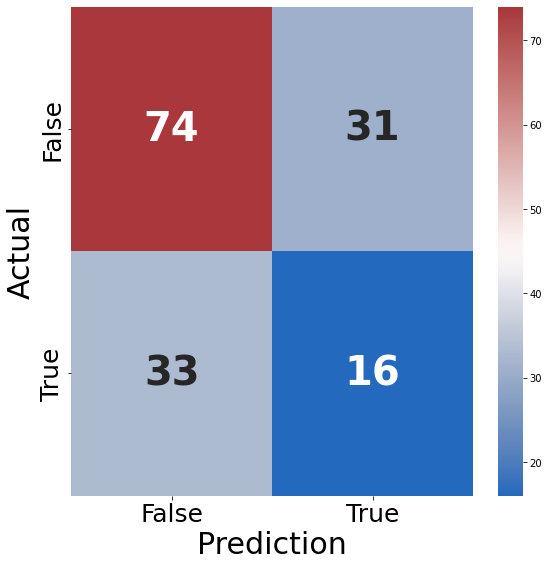

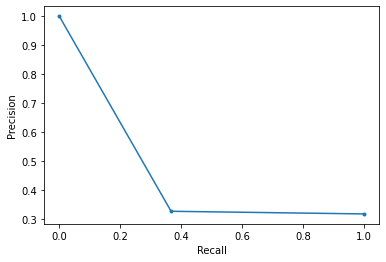

In [22]:
summary_of_model(dummy_clf, X_train, X_test, y_train, y_test, .5)

## Gradient Boosted Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
grid_values_boost = {'n_estimators': [10, 20, 30, 40, 50], 
                     'min_samples_split':[4, 5, 6], 
                     'min_samples_leaf':[4, 5, 6],
                     'learning_rate': [.1, .2, .3, .4, .5], 
                     'max_depth': [2, 3, 4]}
clf_boost = GradientBoostingClassifier()
grid_clf_boost = GridSearchCV(clf_boost, param_grid=grid_values_boost, cv=3, scoring='roc_auc', n_jobs=7, verbose=2)
grid_clf_boost.fit(X_train, y_train)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=7,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='roc_auc', verbose=2)

In [24]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost.best_params_, grid_clf_boost.best_score_))

Best Params: {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 30}, 
 Best score: 0.8442901777367949


In [25]:
thresh = find_threshold(grid_clf_boost, y_test, X_test)
print(thresh)

0.2699999999999998


              precision    recall  f1-score   support

           0       0.90      0.78      0.84       105
           1       0.63      0.82      0.71        49

    accuracy                           0.79       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.79      0.80       154

Recall of diabetes on the training set: 0.91
Accuracy on the training set: 0.78
Recall of diabetes class on the test set: 0.82
Accuracy on the test set: 0.79
[[82 23]
 [ 9 40]]


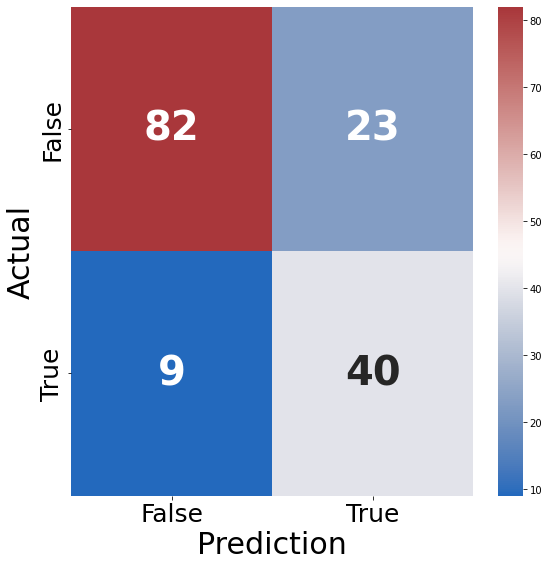

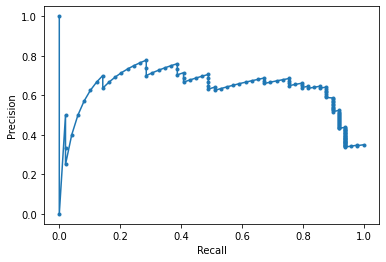

In [26]:
summary_of_model(grid_clf_boost, X_train, X_test, y_train, y_test, thresh)

## Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression
grid_values_log = {'penalty': ['l1','l2'], 'C': np.logspace(-4, 4, 200), 'solver': ['liblinear']}
clf_log = LogisticRegression()
grid_clf_log = GridSearchCV(clf_log, param_grid=grid_values_log, cv=3, scoring='roc_auc', n_jobs=6)
grid_clf_log.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=6,
             param_grid={'C': array([1.00000000e-04, 1.09698580e-04, 1.20337784e-04, 1.32008840e-04,
       1.44811823e-04, 1.58856513e-04, 1.74263339e-04, 1.91164408e-04,
       2.09704640e-04, 2.30043012e-04, 2.52353917e-04, 2.76828663e-04,
       3.03677112e-04, 3.33129479e-04, 3.65438307e-04, 4.00880633e-04,
       4.39760361e-04, 4.82410870e-04...
       1.72258597e+03, 1.88965234e+03, 2.07292178e+03, 2.27396575e+03,
       2.49450814e+03, 2.73644000e+03, 3.00183581e+03, 3.29297126e+03,
       3.61234270e+03, 3.96268864e+03, 4.34701316e+03, 4.76861170e+03,
       5.23109931e+03, 5.73844165e+03, 6.29498899e+03, 6.90551352e+03,
       7.57525026e+03, 8.30994195e+03, 9.11588830e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [28]:
print('Best Params: {}, \n Best score: {:.2f}'.format(grid_clf_log.best_params_, grid_clf_log.best_score_))

Best Params: {'C': 0.2612675225563329, 'penalty': 'l2', 'solver': 'liblinear'}, 
 Best score: 0.85


In [29]:
thresh = find_threshold(grid_clf_log, y_test, X_test)
print(thresh)

0.18999999999999972


              precision    recall  f1-score   support

           0       0.88      0.65      0.75       105
           1       0.52      0.82      0.63        49

    accuracy                           0.70       154
   macro avg       0.70      0.73      0.69       154
weighted avg       0.77      0.70      0.71       154

Recall of diabetes on the training set: 0.93
Accuracy on the training set: 0.68
Recall of diabetes class on the test set: 0.82
Accuracy on the test set: 0.70
[[68 37]
 [ 9 40]]


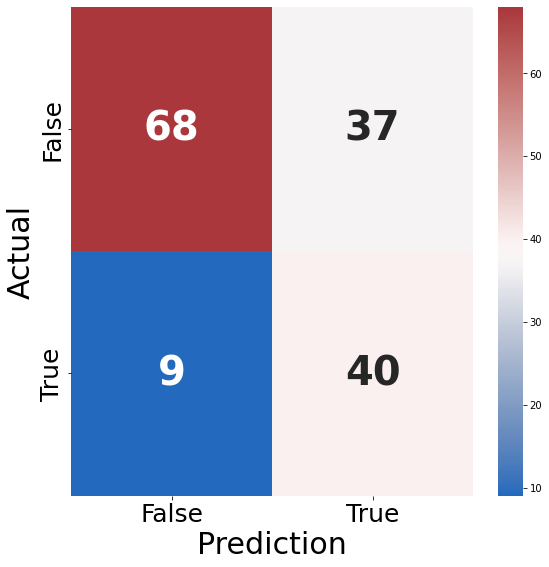

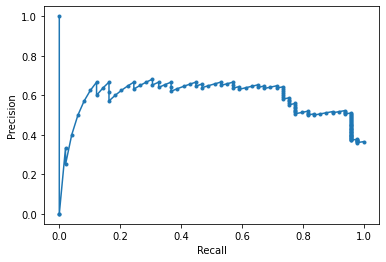

In [30]:
summary_of_model(grid_clf_log, X_train, X_test, y_train, y_test, thresh)

## Support Vector Machine Classifier

In [31]:
from sklearn.svm import SVC
svc_param_grid = {'C': [1e-1, 1, 10, 100, 1000],
                  'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4],
                  'kernel': ['rbf'],
                  'probability': [True]} # , , 'sigmoid' 
clf_svc = SVC()
grid_clf_svc = GridSearchCV(clf_svc, svc_param_grid, cv=3, scoring='roc_auc', n_jobs=6, verbose=2)
grid_clf_svc.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=6,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf'], 'probability': [True]},
             scoring='roc_auc', verbose=2)

In [32]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_svc.best_params_, grid_clf_svc.best_score_))

Best Params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}, 
 Best score: 0.8532385446010876


In [33]:
thresh = find_threshold(grid_clf_svc, y_test, X_test)
print(thresh)

0.18999999999999972


              precision    recall  f1-score   support

           0       0.89      0.70      0.78       105
           1       0.56      0.82      0.66        49

    accuracy                           0.73       154
   macro avg       0.72      0.76      0.72       154
weighted avg       0.78      0.73      0.74       154

Recall of diabetes on the training set: 0.93
Accuracy on the training set: 0.71
Recall of diabetes class on the test set: 0.82
Accuracy on the test set: 0.73
[[73 32]
 [ 9 40]]


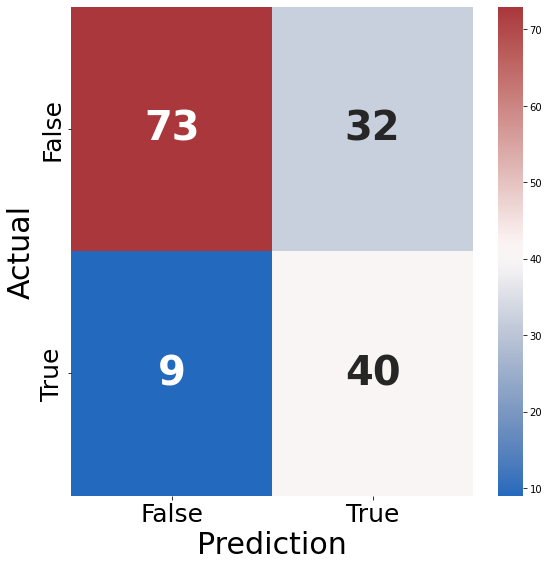

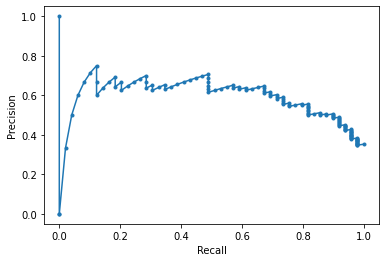

In [34]:
summary_of_model(grid_clf_svc, X_train, X_test, y_train, y_test, thresh)

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest_param_grid = {'n_estimators': np.arange(50, 100, 200), 
                     'max_depth': [2, 3, 4], 
                     'max_features': ['auto', 'sqrt', 'log2', None]}
clf_forest = RandomForestClassifier()
grid_clf_forest = GridSearchCV(clf_forest, forest_param_grid, cv=3, n_jobs=6, scoring='roc_auc')
grid_clf_forest.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': array([50])},
             scoring='roc_auc')

In [36]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_forest.best_params_, grid_clf_forest.best_score_))

Best Params: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 50}, 
 Best score: 0.8463921342463641


In [37]:
thresh = find_threshold(grid_clf_forest, y_test, X_test)
print(thresh)

0.32999999999999985


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       105
           1       0.66      0.82      0.73        49

    accuracy                           0.81       154
   macro avg       0.78      0.81      0.79       154
weighted avg       0.82      0.81      0.81       154

Recall of diabetes on the training set: 0.90
Accuracy on the training set: 0.80
Recall of diabetes class on the test set: 0.82
Accuracy on the test set: 0.81
[[84 21]
 [ 9 40]]


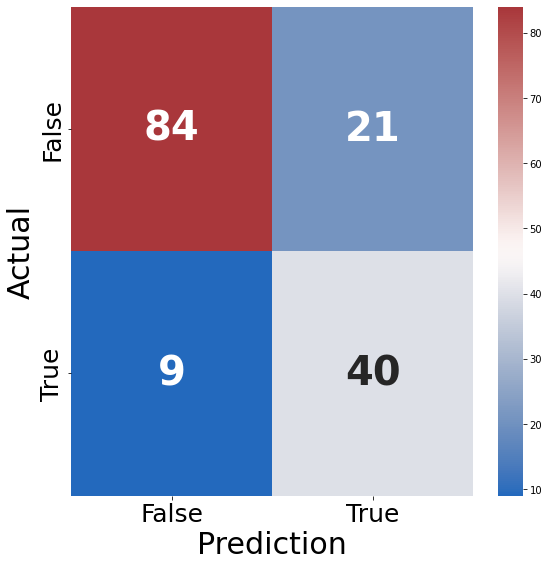

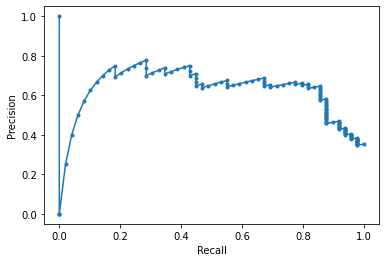

In [38]:
summary_of_model(grid_clf_forest, X_train, X_test, y_train, y_test, thresh)

## KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [2, 3, 4]}
grid_clf_knn = GridSearchCV(clf_knn, knn_param_grid,cv=3, n_jobs=6, scoring='roc_auc')
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': [2, 3, 4]}, scoring='roc_auc')

In [40]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_knn.best_params_, grid_clf_knn.best_score_))

Best Params: {'n_neighbors': 4}, 
 Best score: 0.7905387134969901


In [41]:
thresh = find_threshold(grid_clf_knn, y_test, X_test)
print(thresh)

-3.0878077872387166e-16


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.32      1.00      0.48        49

    accuracy                           0.32       154
   macro avg       0.16      0.50      0.24       154
weighted avg       0.10      0.32      0.15       154

Recall of diabetes on the training set: 1.00
Accuracy on the training set: 0.36
Recall of diabetes class on the test set: 1.00
Accuracy on the test set: 0.32
[[  0 105]
 [  0  49]]


/home/jcummings/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jcummings/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jcummings/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


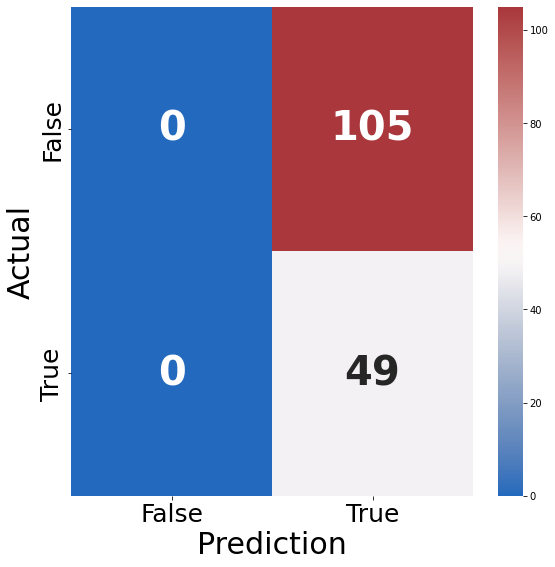

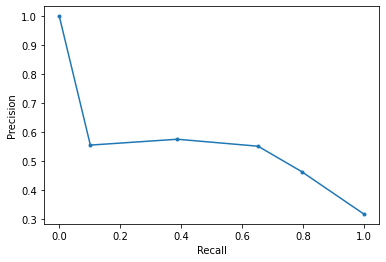

In [42]:
summary_of_model(grid_clf_knn, X_train, X_test, y_train, y_test, thresh)

## Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
tree_param_grid = {'max_depth': np.arange(1, 11), 'max_features': ['auto', 'sqrt', 'log2', None] }
grid_clf_tree = GridSearchCV(clf_tree, tree_param_grid,cv=3, n_jobs=6, scoring='roc_auc')
grid_clf_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='roc_auc')

In [44]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_tree.best_params_, grid_clf_tree.best_score_))

Best Params: {'max_depth': 3, 'max_features': None}, 
 Best score: 0.7808268030086497


In [45]:
thresh = find_threshold(grid_clf_tree, y_test, X_test)
print(thresh)

0.3899999999999999


              precision    recall  f1-score   support

           0       0.89      0.71      0.79       105
           1       0.57      0.82      0.67        49

    accuracy                           0.75       154
   macro avg       0.73      0.77      0.73       154
weighted avg       0.79      0.75      0.76       154

Recall of diabetes on the training set: 0.91
Accuracy on the training set: 0.72
Recall of diabetes class on the test set: 0.82
Accuracy on the test set: 0.75
[[75 30]
 [ 9 40]]


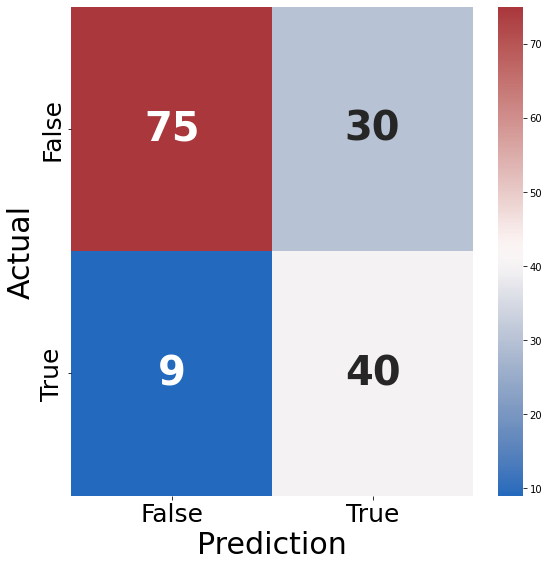

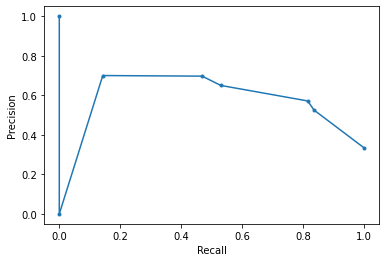

In [46]:
summary_of_model(grid_clf_tree, X_train, X_test, y_train, y_test, thresh)